<a href="https://colab.research.google.com/github/rajeshwari179/summer_research/blob/main/opt_spatial_funtion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

def spatial_loss(num_neurons):


    # # Calculate pairwise correlations
    # outputs_centered = outputs - outputs.mean(dim=0)
    # pairwise_correlations = torch.matmul(outputs_centered.T, outputs_centered) / (outputs_centered.size(0) - 1)
    # pairwise_correlations /= (outputs_centered.std(dim=0).unsqueeze(1) * outputs_centered.std(dim=0).unsqueeze(0) + 1e-8)

    # Calculate the grid size and ensure it is a perfect square
    grid_size = int(torch.sqrt(torch.tensor(num_neurons, dtype=torch.float32)))
    if grid_size * grid_size != num_neurons:
        raise ValueError("Number of neurons must be a perfect square to form a grid.")

    # Calculate distances in the grid
    grid_indices = torch.arange(grid_size)
    x, y = torch.meshgrid(grid_indices, grid_indices)
    positions = torch.stack([x, y], dim=-1).reshape(-1, 2).float()

    pairwise_distances = torch.cdist(positions, positions, p=2)
    distances = 1 / (pairwise_distances + 1)

    # Compute the spatial loss
    # SL = torch.mean(torch.abs(pairwise_correlations - distances))

    return pairwise_distances

v = spatial_loss(9)
print(v)


tensor([[0.0000, 1.0000, 2.0000, 1.0000, 1.4142, 2.2361, 2.0000, 2.2361, 2.8284],
        [1.0000, 0.0000, 1.0000, 1.4142, 1.0000, 1.4142, 2.2361, 2.0000, 2.2361],
        [2.0000, 1.0000, 0.0000, 2.2361, 1.4142, 1.0000, 2.8284, 2.2361, 2.0000],
        [1.0000, 1.4142, 2.2361, 0.0000, 1.0000, 2.0000, 1.0000, 1.4142, 2.2361],
        [1.4142, 1.0000, 1.4142, 1.0000, 0.0000, 1.0000, 1.4142, 1.0000, 1.4142],
        [2.2361, 1.4142, 1.0000, 2.0000, 1.0000, 0.0000, 2.2361, 1.4142, 1.0000],
        [2.0000, 2.2361, 2.8284, 1.0000, 1.4142, 2.2361, 0.0000, 1.0000, 2.0000],
        [2.2361, 2.0000, 2.2361, 1.4142, 1.0000, 1.4142, 1.0000, 0.0000, 1.0000],
        [2.8284, 2.2361, 2.0000, 2.2361, 1.4142, 1.0000, 2.0000, 1.0000, 0.0000]])


In [ ]:
def spatial_loss(num_neurons):


    # Calculate pairwise correlations
    # outputs_centered = outputs - outputs.mean(dim=0)
    # pairwise_correlations = torch.matmul(outputs_centered.T, outputs_centered) / (outputs_centered.size(0) - 1)
    # pairwise_correlations /= (outputs_centered.std(dim=0).unsqueeze(1) * outputs_centered.std(dim=0).unsqueeze(0) + 1e-8)

    # Calculate the grid size and ensure it is a perfect square
    grid_size = int(torch.sqrt(torch.tensor(num_neurons, dtype=torch.float32)))
    if grid_size * grid_size != num_neurons:
        raise ValueError("Number of neurons must be a perfect square to form a grid.")

    # Calculate distances in the grid
    distances = torch.zeros((num_neurons, num_neurons))
    for i in range(grid_size):
        for j in range(grid_size):
            for k in range(grid_size):
                for l in range(grid_size):
                    index_1 = i * grid_size + j
                    index_2 = k * grid_size + l
                    distance = torch.sqrt(torch.tensor((i - k)**2 + (j - l)**2, dtype=torch.float32))
                    distances[index_1, index_2] = 1 / (distance + 1)

    # Compute the spatial loss
    # SL = torch.mean(torch.abs(pairwise_correlations - distances))

    return distances
v = spatial_loss(9)
print(v)

tensor([[1.0000, 0.5000, 0.3333, 0.5000, 0.4142, 0.3090, 0.3333, 0.3090, 0.2612],
        [0.5000, 1.0000, 0.5000, 0.4142, 0.5000, 0.4142, 0.3090, 0.3333, 0.3090],
        [0.3333, 0.5000, 1.0000, 0.3090, 0.4142, 0.5000, 0.2612, 0.3090, 0.3333],
        [0.5000, 0.4142, 0.3090, 1.0000, 0.5000, 0.3333, 0.5000, 0.4142, 0.3090],
        [0.4142, 0.5000, 0.4142, 0.5000, 1.0000, 0.5000, 0.4142, 0.5000, 0.4142],
        [0.3090, 0.4142, 0.5000, 0.3333, 0.5000, 1.0000, 0.3090, 0.4142, 0.5000],
        [0.3333, 0.3090, 0.2612, 0.5000, 0.4142, 0.3090, 1.0000, 0.5000, 0.3333],
        [0.3090, 0.3333, 0.3090, 0.4142, 0.5000, 0.4142, 0.5000, 1.0000, 0.5000],
        [0.2612, 0.3090, 0.3333, 0.3090, 0.4142, 0.5000, 0.3333, 0.5000, 1.0000]])


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Training on {device}")

# Define the fully connected network with batch normalization and dropout
class FullyConnectedNet(nn.Module):
    def __init__(self):
        super(FullyConnectedNet, self).__init__()
        self.fc1 = nn.Linear(32 * 32, 1024)
        self.bn1 = nn.BatchNorm1d(1024)
        self.fc2 = nn.Linear(1024, 512)
        self.bn2 = nn.BatchNorm1d(512)
        self.fc3 = nn.Linear(512, 256)
        self.bn3 = nn.BatchNorm1d(256)
        self.fc4 = nn.Linear(256, 10)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = x.view(-1, 32 * 32)  # Flatten the input
        x = torch.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = torch.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = torch.relu(self.bn3(self.fc3(x)))
        x = self.dropout(x)
        x = self.fc4(x)
        return x

# Data augmentation and normalization
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# Initialize the model, loss function, and optimizer
model = FullyConnectedNet().to(device)  # Move model to GPU
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Function to apply L1 regularization
def l1_regularization(model, lambda_l1):
    l1_norm = sum(p.abs().sum() for p in model.parameters())
    return lambda_l1 * l1_norm

# Function to calculate spatial loss
def spatial_loss(outputs):
    num_neurons = outputs.size(1)

    # Calculate pairwise correlations
    outputs_centered = outputs - outputs.mean(dim=0)
    pairwise_correlations = torch.matmul(outputs_centered.T, outputs_centered) / (outputs_centered.size(0) - 1)
    pairwise_correlations /= (outputs_centered.std(dim=0).unsqueeze(1) * outputs_centered.std(dim=0).unsqueeze(0) + 1e-8)

    # Calculate the grid size and ensure it is a perfect square
    grid_size = int(torch.sqrt(torch.tensor(num_neurons, dtype=torch.float32)))
    if grid_size * grid_size != num_neurons:
        raise ValueError("Number of neurons must be a perfect square to form a grid.")

    # Calculate distances in the grid
    grid_indices = torch.arange(grid_size, device=outputs.device)
    x, y = torch.meshgrid(grid_indices, grid_indices)
    positions = torch.stack([x, y], dim=-1).reshape(-1, 2).float()

    pairwise_distances = torch.cdist(positions, positions, p=2)
    distances = 1 / (pairwise_distances + 1)

    # Compute the spatial loss
    SL = torch.mean(torch.abs(pairwise_correlations - distances))

    return SL

# Training the model
num_epochs = 5
lambda_l1 = 0.0001
lambda_spatial = 10  # Weight for the spatial loss

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for data, target in train_loader:
        data, target = data.to(device), target.to(device)  # Move data to GPU
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss += l1_regularization(model, lambda_l1)

        # Extract first layer outputs and calculate spatial loss
        first_layer_output = torch.relu(model.bn1(model.fc1(data.view(-1, 32 * 32).to(device))))
        sl = spatial_loss(first_layer_output)
        # print("spatial loss", sl)
        loss += lambda_spatial * sl

        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {total_loss/len(train_loader)}')

# Testing the model
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)  # Move data to GPU
        output = model(data)
        _, predicted = torch.max(output.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

print(f'Accuracy: {100 * correct / total}%')


Training on cuda
Files already downloaded and verified
Files already downloaded and verified
Epoch 1/5, Loss: 5.739513556365772
Epoch 2/5, Loss: 4.938085759692179
Epoch 3/5, Loss: 4.814462473935179
Epoch 4/5, Loss: 4.737267035657488
Epoch 5/5, Loss: 4.632576594267355
Accuracy: 31.76%


Files already downloaded and verified


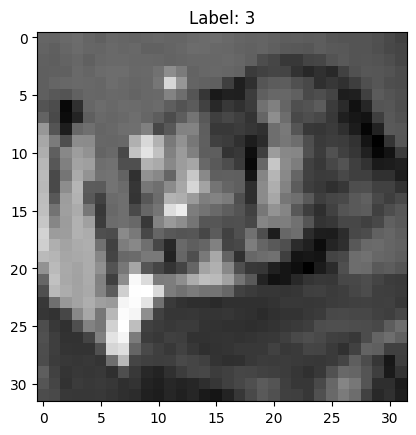

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Load a single image from the CIFAR-10 dataset
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
single_image, label = test_dataset[0]  # Get the first image from the test dataset
single_image = single_image.unsqueeze(0)  # Add batch dimension

# Plot the original image
plt.imshow(single_image.squeeze().numpy(), cmap='gray')
plt.title(f'Label: {label}')
plt.show()


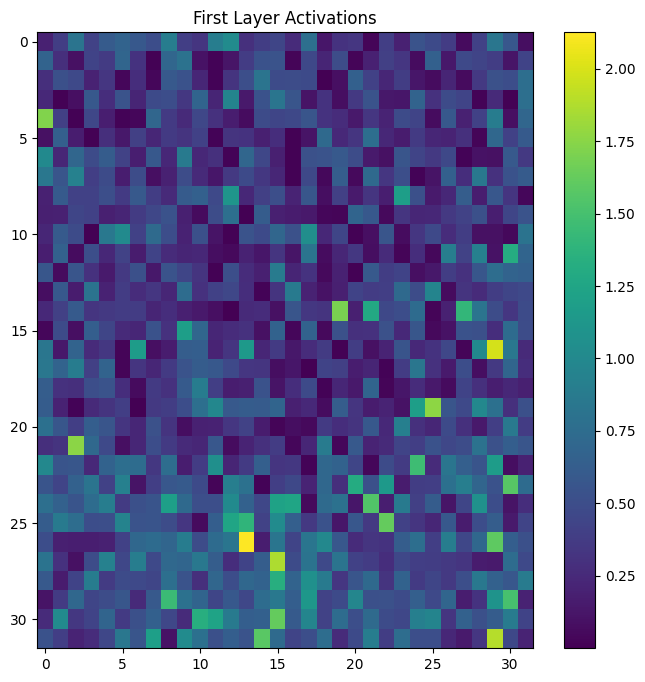

In [ ]:
# Function to get activations from the first layer
def get_first_layer_activations(model, image):
    image = image.to(device)
    with torch.no_grad():
        x = image.view(-1, 32 * 32)  # Flatten the input
        activations = abs(model.bn1(model.fc1(x)))
    return activations.cpu().numpy()

import matplotlib.pyplot as plt
import numpy as np

# Plot the first layer activations on a 2D sheet
def plot_first_layer_activations(activations):
    num_neurons = activations.shape[0]
    grid_size = int(np.sqrt(num_neurons))

    # Ensure the number of neurons forms a perfect square
    if grid_size * grid_size != num_neurons:
        raise ValueError("Number of neurons must be a perfect square to form a grid.")

    activations_grid = activations.reshape(grid_size, grid_size)

    plt.figure(figsize=(8, 8))
    plt.imshow(activations_grid, cmap='viridis', aspect='auto')
    plt.colorbar()
    plt.title('First Layer Activations')
    plt.show()

# Get activations and plot
model.eval()
first_layer_activations = get_first_layer_activations(model, single_image)
plot_first_layer_activations(first_layer_activations[0])


Weights of the first neuron:
 [0.00231235 0.00495616 0.01822546 ... 0.01629315 0.01750742 0.03117541]


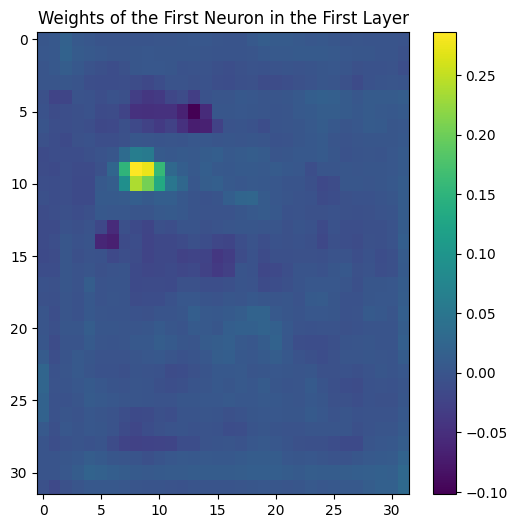

In [ ]:
#weights of first neuron and plot
# Print the weights of the first neuron
first_neuron_weights = model.fc1.weight[0].detach().cpu().numpy()
print("Weights of the first neuron:\n", first_neuron_weights)

# Plot the weights of the first neuron
def plot_first_neuron_weights(weights):
    # Reshape the weights to 32x32 as the input images are 32x32
    weights_reshaped = weights.reshape(32, 32)

    plt.figure(figsize=(6, 6))
    plt.imshow(weights_reshaped, cmap='viridis', aspect='auto')
    plt.colorbar()
    plt.title('Weights of the First Neuron in the First Layer')
    plt.show()

plot_first_neuron_weights(first_neuron_weights)


Weights of the first neuron:
 [ 0.00175672  0.0031754   0.00410415 ...  0.00475446  0.00134255
 -0.00045409]


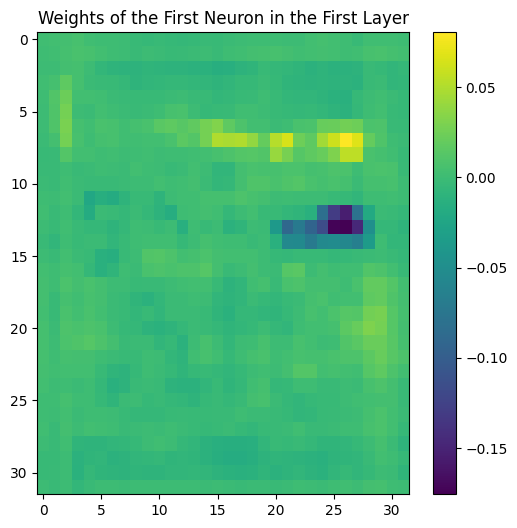

In [ ]:
#weights of first neuron and plot
# Print the weights of the first neuron
first_neuron_weights = model.fc1.weight[10].detach().cpu().numpy()
print("Weights of the first neuron:\n", first_neuron_weights)

# Plot the weights of the first neuron
def plot_first_neuron_weights(weights):
    # Reshape the weights to 32x32 as the input images are 32x32
    weights_reshaped = weights.reshape(32, 32)

    plt.figure(figsize=(6, 6))
    plt.imshow(weights_reshaped, cmap='viridis', aspect='auto')
    plt.colorbar()
    plt.title('Weights of the First Neuron in the First Layer')
    plt.show()

plot_first_neuron_weights(first_neuron_weights)


Weights of the first neuron:
 [-0.01154473 -0.00759149 -0.00697589 ...  0.02071458  0.0167328
  0.01553345]


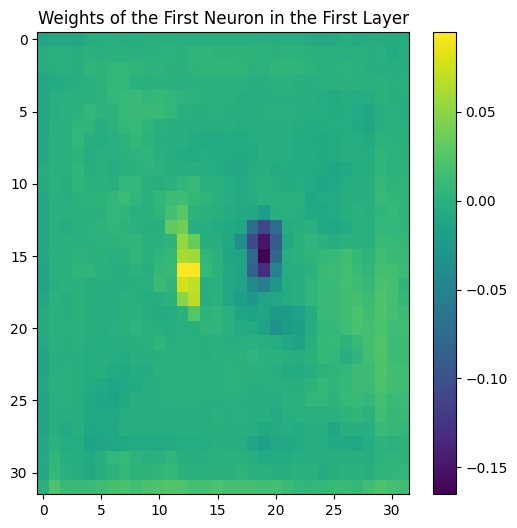

In [ ]:
#weights of first neuron and plot
# Print the weights of the first neuron
first_neuron_weights = model.fc1.weight[100].detach().cpu().numpy()
print("Weights of the first neuron:\n", first_neuron_weights)

# Plot the weights of the first neuron
def plot_first_neuron_weights(weights):
    # Reshape the weights to 32x32 as the input images are 32x32
    weights_reshaped = weights.reshape(32, 32)

    plt.figure(figsize=(6, 6))
    plt.imshow(weights_reshaped, cmap='viridis', aspect='auto')
    plt.colorbar()
    plt.title('Weights of the First Neuron in the First Layer')
    plt.show()

plot_first_neuron_weights(first_neuron_weights)


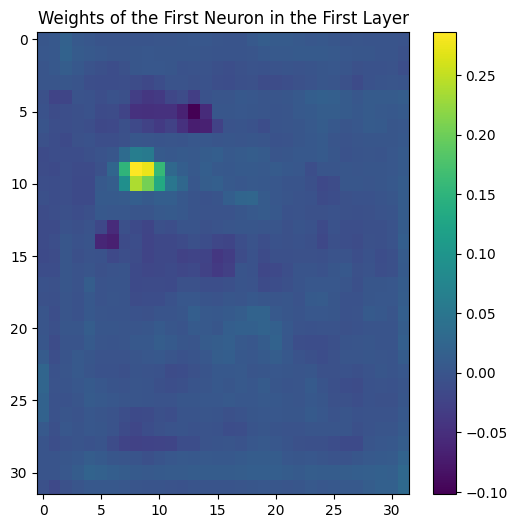

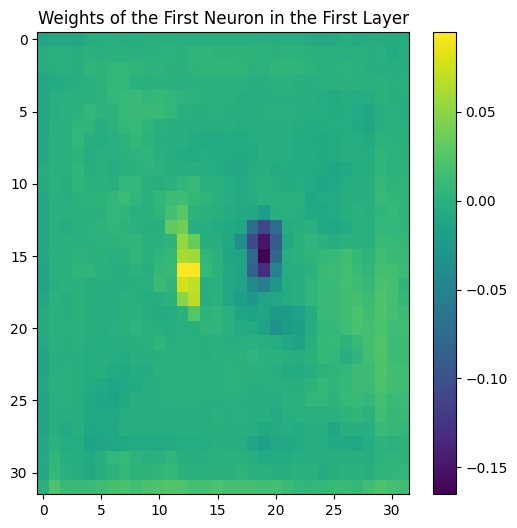

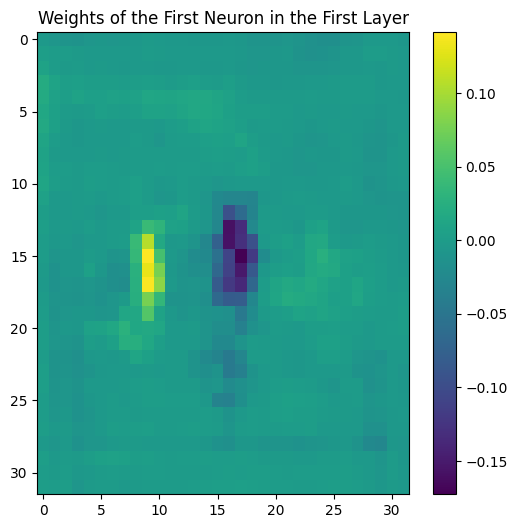

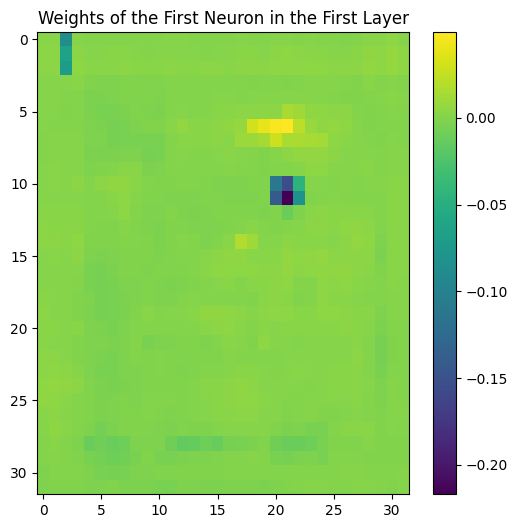

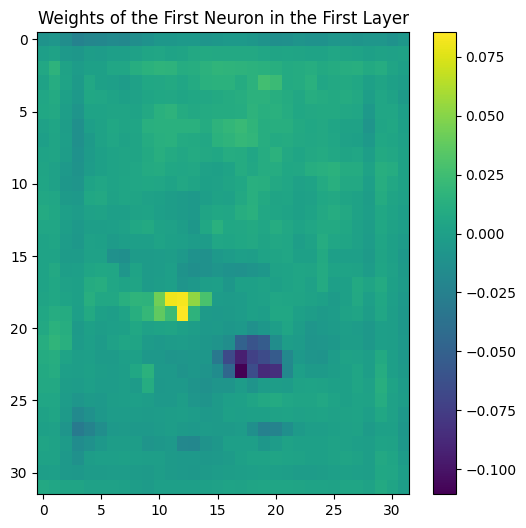

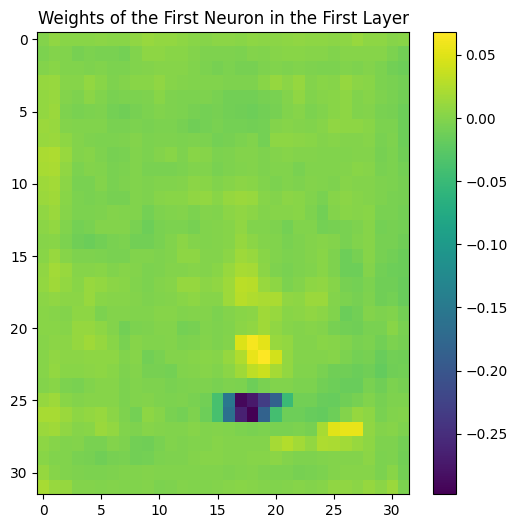

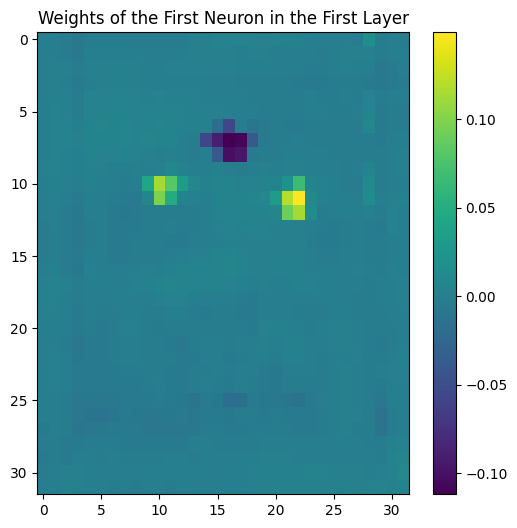

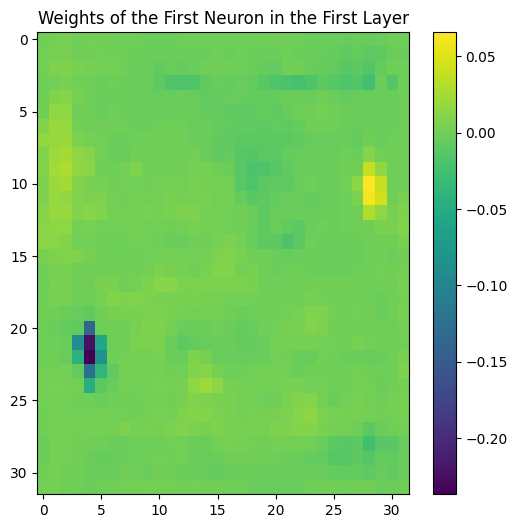

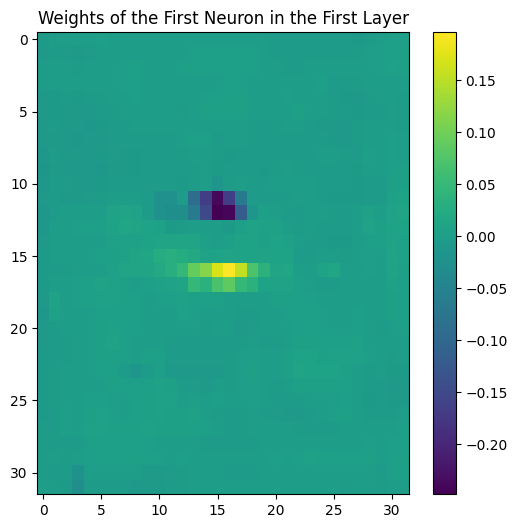

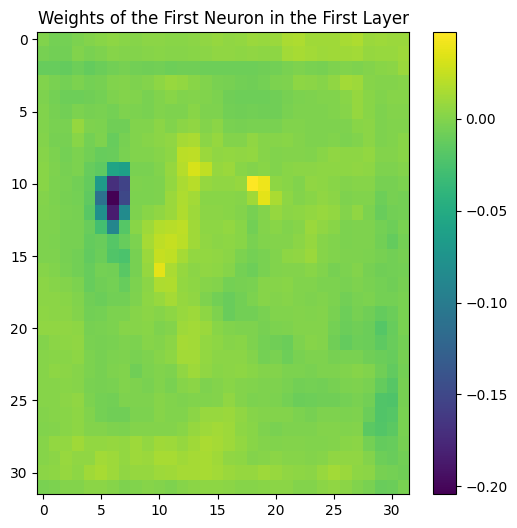

In [ ]:
def plot_first_neuron_weights(weights):
      # Reshape the weights to 32x32 as the input images are 32x32
      weights_reshaped = weights.reshape(32, 32)

      plt.figure(figsize=(6, 6))
      plt.imshow(weights_reshaped, cmap='viridis', aspect='auto')
      plt.colorbar()
      plt.title('Weights of the First Neuron in the First Layer')
      plt.show()
for i in range(10):
  first_neuron_weights = model.fc1.weight[100*i].detach().cpu().numpy()
  # print("Weights of the first neuron:\n", first_neuron_weights)

  # Plot the weights of the first neuron


  plot_first_neuron_weights(first_neuron_weights)
